In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('*')
url = '*'
df = pd.read_spss(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.describe()

,ID,Age,Household_members,Political_orientation,BEHAVIORS,PREV_TOT,Knowledge_about_coronavirus,GAD,Neuroticism,Extraversion,...,ZBR_COMP_CHECK,ZNCPAS_SOM,ZCPAS_NOSOM,ZC19PAS_SOM,ZNC19PAS_FEAR,ZCPS_MOOD,ZCPS_PRECAUT,ZCPS_AVOID,ZCPS_WORRY,FAC1_CORONAPHOBIA
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,...,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,3.470000e+02,347.000000
mean,174.000000,28.982709,2.524496,5.213256,1.507205,14.000000,8.636888,0.692466,2.859510,3.144813,...,-0.009789,-0.003622,-0.014842,-0.003576,-0.009020,-0.002307,-0.014528,-0.005363,7.781160e-16,0.000000
std,100.314505,9.420783,1.466920,2.374125,3.648078,4.581314,1.511275,0.805084,0.867632,0.902847,...,0.999484,1.004020,0.998133,1.001682,0.995204,0.986772,0.981021,0.993184,1.000000e+00,1.000000
min,1.000000,19.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,1.000000,1.000000,...,-0.967456,-0.865483,-1.009156,-0.761229,-1.288291,-1.470545,-1.100730,-1.139407,-9.117104e-01,-1.300553
25%,87.500000,20.000000,1.500000,4.000000,0.000000,10.000000,8.000000,0.000000,2.250000,2.500000,...,-0.781287,-0.865483,-0.725650,-0.761229,-0.494569,-0.732170,-0.871465,-1.139407,-7.989650e-01,-0.702526
50%,174.000000,25.000000,3.000000,5.000000,0.000000,14.000000,9.000000,0.428571,3.000000,3.000000,...,-0.222783,-0.865483,-0.158638,-0.377425,-0.057738,0.006205,-0.183669,-0.310958,-3.479836e-01,-0.296368
75%,260.500000,37.000000,3.000000,7.000000,1.000000,18.000000,10.000000,1.000000,3.375000,3.750000,...,0.521890,0.727588,0.408374,0.390183,0.619914,0.744580,0.504127,0.517490,4.412341e-01,0.526337
max,347.000000,54.000000,8.000000,10.000000,24.000000,24.000000,12.000000,3.000000,5.000000,5.000000,...,3.500580,3.462052,4.093952,3.844419,3.194576,2.959704,3.484576,2.174388,3.598104e+00,4.233288


In [ ]:
df['Vaccination_status.binary'].value_counts()

didn’t apply but planning to and applied for or/and already vaccinated    190
didn’t apply and not planning to                                          157
Name: Vaccination_status.binary, dtype: int64

In [ ]:
df.rename(columns={'Vaccination_status.binary': 'VSTARGET'}, inplace=True)

In [ ]:
# didn’t apply but planning to and applied for or/and already vaccinated  = 1
# didn’t apply and not planning to = 0

In [ ]:
# replace values

In [ ]:
unique_education_values = df['Education'].unique()
print(unique_education_values)


['primary or/and Secondary school', 'student', 'university degree (bachelor's or master's)', 'magister or PhD', 'higher school']
Categories (5, object): ['higher school', 'magister or PhD', 'primary or/and Secondary school',
                         'student', 'university degree (bachelor's or master's)']


In [ ]:
df['Education'].replace(['primary or/and Secondary school'],  0, inplace=True)
df['Education'].replace(['student'],  1, inplace=True)
df['Education'].replace(['higher school'],  2, inplace=True)
df['Education'].replace(['university degree (bachelor\'s or master\'s)'], 'university degree (bachelor_s or master_s)', inplace=True)
df['Education'].replace(['university degree (bachelor_s or master_s)'],  3, inplace=True)
df['Education'].replace(['magister or PhD'],  4, inplace=True)
df['Mat.status'].replace(['below average'],  0, inplace=True)
df['Mat.status'].replace(['somewhat below average'],  1, inplace=True)
df['Mat.status'].replace(['average'],  2, inplace=True)
df['Mat.status'].replace(['somewhat above average'],  3, inplace=True)
df['Mat.status'].replace(['above average'],  4, inplace=True)
df['Gender'].replace(['male'],   1, inplace=True)
df['Gender'].replace(['female'],   2, inplace=True)
df['VSTARGET'].replace(['didn’t apply but planning to and applied for or/and already vaccinated'],  1, inplace=True)
df['VSTARGET'].replace(['didn’t apply and not planning to'],  0, inplace=True)

In [ ]:
df

,ID,Gender,Age,Education,Mat.status,Household_members,COVID_infection,Political_orientation,Vaccination_status,VSTARGET,...,ZBR_COMP_CHECK,ZNCPAS_SOM,ZCPAS_NOSOM,ZC19PAS_SOM,ZNC19PAS_FEAR,ZCPS_MOOD,ZCPS_PRECAUT,ZCPS_AVOID,ZCPS_WORRY,FAC1_CORONAPHOBIA
0,1.0,1,20.0,0,2,5.0,no,10.0,didn’t apply and not planning to,0,...,3.500580,2.368898,3.810446,3.460615,2.814014,0.744580,0.504127,0.517490,1.004961,2.186033
1,44.0,2,20.0,1,2,4.0,not sure,3.0,didn’t apply and not planning to,0,...,0.149553,-0.865483,0.975386,-0.761229,-0.494569,-1.470545,1.191923,0.103266,-0.573474,0.048364
2,158.0,1,25.0,0,4,2.0,yes,10.0,didn’t apply but planning to,1,...,3.500580,3.462052,4.093952,3.844419,3.194576,2.959704,3.484576,2.174388,3.598104,4.233288
3,160.0,2,34.0,3,3,3.0,not sure,8.0,applied for or/and already vaccinated,1,...,3.500580,2.368898,4.093952,2.309203,2.550720,1.482954,3.255310,2.174388,3.485359,3.513494
4,162.0,2,20.0,1,2,4.0,no,6.0,didn’t apply but planning to,1,...,1.452731,1.856823,2.676422,2.309203,1.988899,2.221329,1.650453,2.174388,2.921632,2.827333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,343.0,1,30.0,3,2,1.0,not sure,5.0,didn’t apply but planning to,1,...,-0.967456,-0.865483,-1.009156,-0.761229,-1.288291,-1.101357,-0.642200,-1.139407,-0.911710,-1.230232
343,344.0,2,28.0,2,2,2.0,not sure,3.0,didn’t apply but planning to,1,...,-0.967456,-0.865483,-0.725650,-0.761229,-1.288291,-1.470545,-1.100730,-1.139407,-0.911710,-1.241328
344,345.0,2,38.0,3,2,3.0,yes,2.0,applied for or/and already vaccinated,1,...,-0.967456,-0.865483,-0.725650,-0.761229,-1.288291,-1.470545,-1.100730,-1.139407,-0.911710,-1.263929
345,346.0,1,20.0,1,2,1.0,no,7.0,didn’t apply but planning to,1,...,-0.967456,-0.865483,-1.009156,-0.761229,-1.288291,-1.470545,-1.100730,-1.139407,-0.911710,-1.269427


In [ ]:
for col in df.columns:
    print(col)

ID
Gender
Age
Education
Mat.status
Household_members
COVID_infection
Political_orientation
Vaccination_status
VSTARGET
BEH01
BEH02
BEH03
BEH04
BEH05
BEH06
PREV1
PREV2
PREV3rec
PREV4
PREV5
CAS01
CAS02
CAS03
CAS04
CAS05
OCS01
OCS02
OCS03
OCS04
CPAS01
CPAS02
CPAS03
CPAS04
CPAS05
CPAS06
CPAS07
CPAS08
CPAS09
CPAS10
CPAS11
CPAS12
CPAS13
CPAS14
CPAS15
C19AS01
C19AS02
C19AS03
C19AS04
C19AS05
C19AS06
C19AS07
CAS01_A
CAS02_A
CAS03_A
CAS04_A
CAS05_A
CAS06_A
CASO7_A
C19PAS01
C19PAS02
C19PAS03
C19PAS04
C19PAS05
C19PAS06
C19PAS07
C19PAS08
C19PAS09
C19PAS10
BRIGE01
BRIGE02
BRIGE03
BRIGE04
BRIGE05
BRIGE06
BRIGE07
BRIGE08
BRIGE09
BRIGE10
BRIGE11
BRIGE12
BRIGE13
BRIGE14
BRIGE15
BRIGE16
BRIGE17
BRIGE18
BRIGE19
BRIGE20
BRIGE21
BRIGE22
BRIGE23
BRIGE24
BRIGE25
BRIGE26
BRIGE27
BRIGE28
BRIGE29
BRIGE30
C19PS01
C19PS02
C19PS03
C19PS04
C19PS05
C19PS06
C19PS07
C19PS08
C19PS09
C19PS10
C19PS11
C19PS12
C19PS13
C19PS14
C19PS15
C19PS16
C19PS17
C19PS18
C19PS19
C19PS20
C19PHOSC01
C19PHOSC02
C19PHOSC03
C19PHOSC04
C19PHOS

# Baseline: LOGREG model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
selected_features = ['Gender', 'Age', 'Education', 'Mat.status', 'Household_members', 'Knowledge_about_coronavirus', 'GAD', 'Neuroticism', 'Extraversion', 'Agreeableness', 'Conscientiousness', 'Openness', 'Political_orientation']
df_subset = df[selected_features]

In [ ]:
features = df_subset
target = df['VSTARGET']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(class_weight='balanced',random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52        32
           1       0.61      0.71      0.66        38

    accuracy                           0.60        70
   macro avg       0.60      0.59      0.59        70
weighted avg       0.60      0.60      0.59        70



In [ ]:
#AUC score
y_pred_proba = logreg.predict_proba(X_test_scaled)[:,  1]
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

AUC: 0.5995065789473685


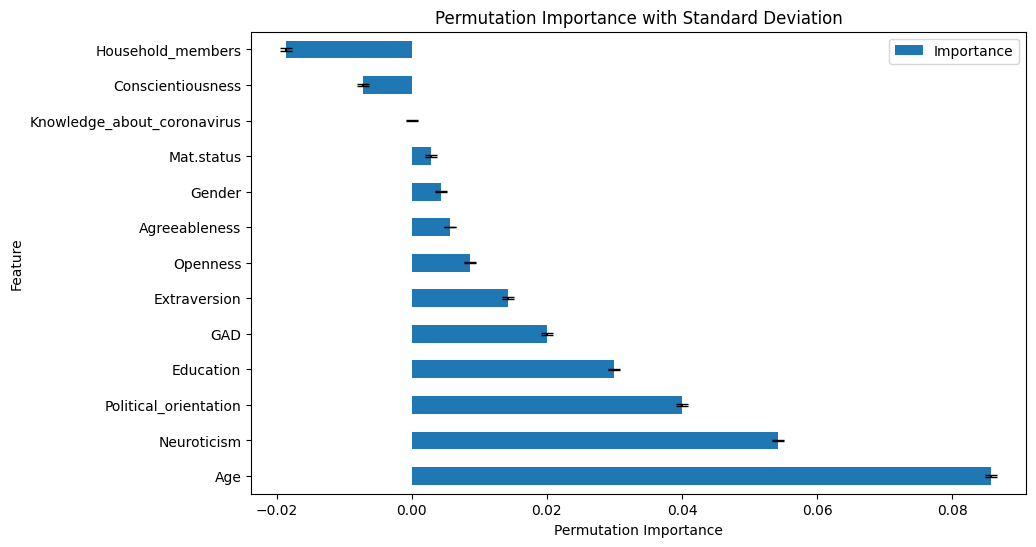

In [ ]:
result = permutation_importance(logreg, X_test_scaled, y_test, n_repeats=10, random_state=42)

feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': result.importances_mean,
    'Standard Deviation': result.importances_std
})

feature_importance = feature_importance.sort_values('Importance', ascending=False)

ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10,  6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')
plt.show()

In [ ]:
#hyperparameter tuning

In [ ]:
features = df_subset
target = df['VSTARGET']

param_grid = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1'],
    'C': [0.001,   0.01,   0.1,   1,   10,   100]
}

logreg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(logreg, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print("Best parameters found: ", best_params)

best_logreg = LogisticRegression(**best_params, random_state=42)
best_logreg.fit(X_train_scaled, y_train)

y_pred_best = best_logreg.predict(X_test_scaled)

print(classification_report(y_test, y_pred_best))

Best parameters found:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.53      0.31      0.39        32
           1       0.57      0.76      0.65        38

    accuracy                           0.56        70
   macro avg       0.55      0.54      0.52        70
weighted avg       0.55      0.56      0.53        70



In [ ]:
y_true = y_test
y_pred = y_pred_best

cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[10 22]
 [ 9 29]]


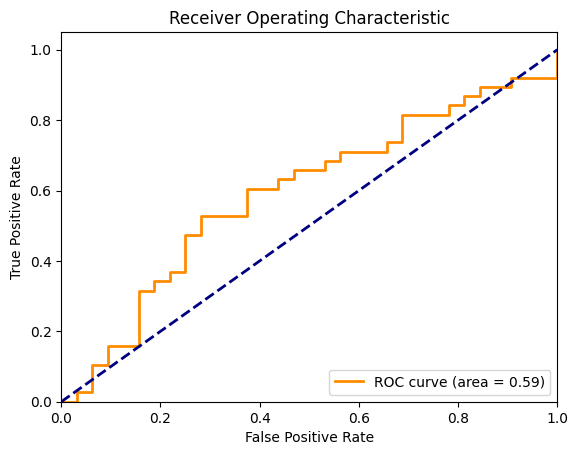

In [ ]:
y_pred_proba_best = best_logreg.predict_proba(X_test_scaled)[:,  1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
auc = roc_auc_score(y_test, y_pred_proba_best)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0,  1], [0,  1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,  1.0])
plt.ylim([0.0,  1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Random forest

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score


features = df_subset
target = df['VSTARGET']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100,  200],
    'max_depth': [None,  10,  20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2,  5],
    'min_samples_leaf': [1,  2],
    'bootstrap': [True]
}


rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)


print(classification_report(y_test, y_pred))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Best params:", grid_search.best_params_)


importances = best_rf_model.feature_importances_
sorted_idx = np.argsort(importances)

for idx in sorted_idx:
    print(f"{features.columns[idx]}: {importances[idx]}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.64      0.50      0.56        32
           1       0.64      0.76      0.70        38

    accuracy                           0.64        70
   macro avg       0.64      0.63      0.63        70
weighted avg       0.64      0.64      0.64        70

Confusion Matrix:
 [[16 16]
 [ 9 29]]
Best params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Gender: 0.02163615630864641
Mat.status: 0.04468547287621148
Education: 0.05463063219687108
Openness: 0.0611667087872973
Household_members: 0.06806573329206182
Political_orientation: 0.07332196441777743
Agreeableness: 0.07579481654617776
Knowledge_about_coronavirus: 0.07693803060829041
Extraversion: 0.08277477224270136
Conscientiousness: 0.0907881336630818
GAD: 0.09814961914641473
Neuroticism: 0.1048869299049401
Age: 0.1471610300095285


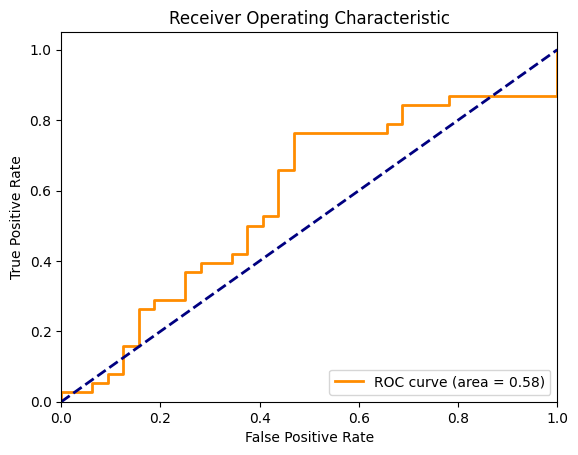

Confusion Matrix with Adjusted Threshold:
 [[17 15]
 [ 9 29]]


In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = best_rf_model.predict_proba(X_test)[:,  1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,  1], [0,  1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,  1.0])
plt.ylim([0.0,  1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

y_pred_sensitive = (y_prob >= optimal_threshold).astype(int)

print("Confusion Matrix with Adjusted Threshold:\n", confusion_matrix(y_test, y_pred_sensitive))

# XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

features = df_subset
target = df['VSTARGET']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


xgb_model = XGBClassifier(objective='binary:logistic', n_jobs=-1, random_state=42)

xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.41      0.46        32
           1       0.58      0.68      0.63        38

    accuracy                           0.56        70
   macro avg       0.55      0.55      0.54        70
weighted avg       0.55      0.56      0.55        70

Confusion Matrix:
 [[13 19]
 [12 26]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,  200,  300],
    'learning_rate': [0.01,  0.1,  0.2],
    'max_depth': [3,  5,  7],
    'subsample': [0.5,  0.7,  1.0],
    'colsample_bytree': [0.5,  0.7,  1.0],
    'gamma': [0,  0.1,  0.2],
    'reg_lambda': [1,  10,  100]
}

xgb_model = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_xgb_model = XGBClassifier(**grid_search.best_params_, random_state=42)
best_xgb_model.fit(X_train_scaled, y_train)

y_pred_best = best_xgb_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_best))

Best set of hyperparameters:  {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'reg_lambda': 10, 'subsample': 0.7}
Best score:  0.6678571428571429
              precision    recall  f1-score   support

           0       0.63      0.38      0.47        32
           1       0.61      0.82      0.70        38

    accuracy                           0.61        70
   macro avg       0.62      0.60      0.58        70
weighted avg       0.62      0.61      0.59        70



In [ ]:
# Save the model
best_xgb_model.save_model('best_xgb_model.json')

In [ ]:
# loaded_model = XGBClassifier()
# loaded_model.load_model('best_xgb_model.json')

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_best = best_xgb_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_best)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[12 20]
 [ 7 31]]


In [ ]:
y_pred_proba = best_xgb_model.predict_proba(X_test_scaled)

threshold =  0.56

y_pred = (y_pred_proba[:,  1] > threshold).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[19 13]
 [13 25]]
